# Week 7
### Rasika Bhalerao
# Agenda
- Tweets dataset
- KNN example
- Decision trees example

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

In [5]:
# Example dataset: tweets from top 20 most followed Twitter users
# (https://dataverse.harvard.edu/dataset.xhtml?id=3047332)

df = pd.read_csv('tweets.csv')
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [6]:
for user in set(df['author']):
  print(user)

selenagomez
ddlovato
ArianaGrande
TheEllenShow
britneyspears
rihanna
KimKardashian
BarackObama
YouTube
jimmyfallon
cnnbrk
Twitter
ladygaga
katyperry
Cristiano
taylorswift13
jtimberlake
shakira
justinbieber
instagram


In [7]:
for tweet in df[df['author']=='Twitter']['content'][:10]:
  print(tweet)
  print()

@ashley_ardinger We shall dub thee: “Meme Master Ashley"

@wakandaho https://t.co/4LYgd60MC6

@ashley_ardinger Meme of the week goes to you. 🏆 https://t.co/gsjBzfDFM8

@MaggyTheBrave What a time it’s been. Happy 10 year, and here’s to many more! 😍

@itsqueenlena You got a pet giraffe?!

@rizahmmed Or is it... https://t.co/pDBup4kfFS

https://t.co/5lUMHzkIZw

#DayOne traditions continue.

Watch the #Inauguration parade LIVE.
https://t.co/lWghuqKB5t

#DayOne begins right now.

The 45th U.S. Presidential #Inauguration is streaming LIVE.

https://t.co/cXqjEOQqZn

Today marks #DayOne.

The 45th U.S. Presidential #Inauguration streams LIVE at 11am ET, right here on Twitter.

https://t.co/cXqjEOQqZn



52542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


(array([  580.,  1275.,  1493.,  2818.,  5370.,  5664.,  8042., 13081.,
        13674.,   545.]),
 array([1.26112176e+18, 1.28622668e+18, 1.31133161e+18, 1.33643653e+18,
        1.36154146e+18, 1.38664638e+18, 1.41175130e+18, 1.43685623e+18,
        1.46196115e+18, 1.48706608e+18, 1.51217100e+18]),
 <a list of 10 Patch objects>)

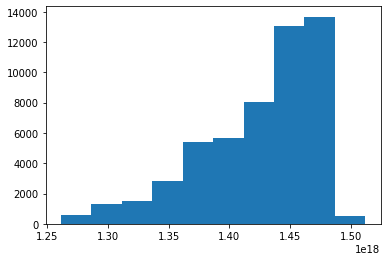

In [8]:
print(len(df))
df['timestamp'] = pd.to_datetime(df['date_time']).astype(int)
plt.hist(df['timestamp'])

## KNN Example

In [21]:
# KNN example problem: predict author given number of likes and number of shares
var1 = 'number_of_likes'
var2 = 'number_of_shares' # 'timestamp'

# Let's use only 3 authors for this
num_labels = 3
chosen_labels = np.random.choice(list(set(df['author'])), num_labels, replace=False)
df_simpler = df.loc[df['author'].isin(chosen_labels)]

# Set up train and test sets
X = df_simpler[[var1, var2]]
label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(df_simpler['author'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(X.head(10))
print(set(Y))

6355
1589
       number_of_likes  number_of_shares
12693              719               107
12694              646                79
12695              522                57
12696              467                51
12697              542                49
12698               22                 2
12699               50                 1
12700              239                23
12701              750               120
12702              906               217
{0, 1, 2}


In [22]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.7432347388294525


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


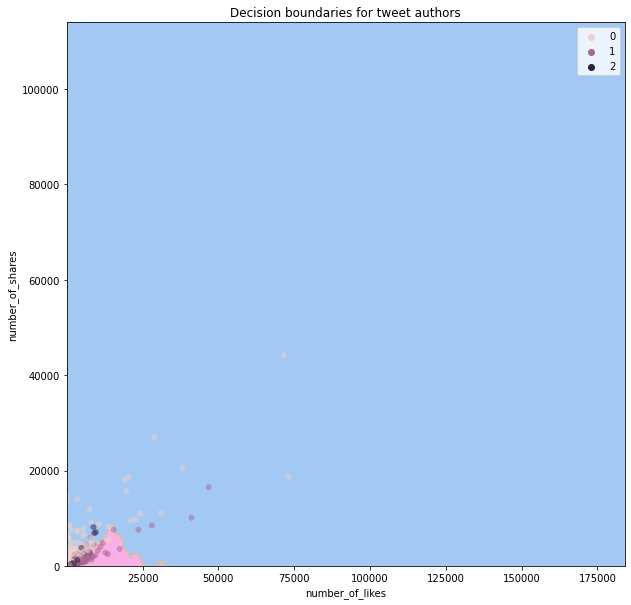

In [23]:
# Plot train set

# Predictions on the whole space
x_min, x_max = X[var1].min(), X[var1].max()
y_min, y_max = X[var2].min(), X[var2].max()
if var2 == 'timestamp':
  steps = 100000000000000
else:
  steps = 1000
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 1000),
    np.arange(y_min, y_max, steps)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the predictions on the space
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(
    xx, yy, Z,
    colors=sns.color_palette(palette='pastel', n_colors=num_labels, as_cmap=True)
)

# Plot the train set
sns.scatterplot(
    x=x_train[var1],
    y=x_train[var2],
    hue=y_train,
    hue_order=sns.color_palette(palette='bright', n_colors=num_labels, as_cmap=True),
    alpha=0.5, edgecolor="none",
    legend='full'
)

# Title, axis labels, legend
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision boundaries for tweet authors')
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

As we can see with var2='timestamp' in the graph above, since timestamps are such huge numbers, the decision boundaries are dominated by it! Number of likes doesn't even matter, and the classification is based entirely on timestamp. The way to fix this would be to normalize the data so the two variables are on the same scale.

## Decision Trees

Defining a decision tree:

- Each node of the tree is a collection of data points
- The tree root has all the data points in it
- A node's children are the collections you get when you split the parent node's collection based on a feature value
 - (e.g. one child gets all x < 5, other child gets all x >= 5, where x is some feature)
- The decision tree is trained (the splits are decided) by splitting each node's data on the feature that results in the largest Information Gain (IG)

In [24]:
# Example: automated content moderation on our (fake) forum!

# For this example, I have picked pieces of 10 comments from various sources,
# mostly the Kaggle toxic comment classification challenge
# (https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

# I have replaced all profanity with <profanity>
# (this can be done with a predetermined word list)

# 1 means labelers deemed it unacceptable for our forum, 0 means it was deemed fine

df = pd.DataFrame({
    'comment': [
        'Yo <profanity> Ja Rule is more succesful then you\'ll ever be',
        'Please do not add nonsense to Wikipedia.',
        'His <profanity> is gonna get fired.',
        'I WILL <profanity> IF YOU REVOKE MY TALK PAGE ACCESS!!!!!!!!!!!!!',
        'That\'s my <profanity>',
        'Wassup <profanity>',
        'Her body is perfect. Face, hips, all of it.',
        '<profanity> off my <profanity> you <profanity> <profanity> pig <profanity>.',
        'This is just bizarre. WTF?',
        'HI FRANKIE HOW ARE YOU I HEARD YOU LIKE TO <profanity> <profanity> <profanity>'
    ],
    'label': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
})

df.head(len(df))

,comment,label
0,Yo <profanity> Ja Rule is more succesful then ...,1
1,Please do not add nonsense to Wikipedia.,0
2,His <profanity> is gonna get fired.,1
3,I WILL <profanity> IF YOU REVOKE MY TALK PAGE ...,1
4,That's my <profanity>,0
5,Wassup <profanity>,1
6,"Her body is perfect. Face, hips, all of it.",0
7,<profanity> off my <profanity> you <profanity>...,1
8,This is just bizarre. WTF?,0
9,HI FRANKIE HOW ARE YOU I HEARD YOU LIKE TO <pr...,1


In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['comment'])
print(vectorizer.get_feature_names())
print(X.toarray())

['access', 'add', 'all', 'are', 'be', 'bizarre', 'body', 'do', 'ever', 'face', 'fired', 'frankie', 'get', 'gonna', 'heard', 'her', 'hi', 'hips', 'his', 'how', 'if', 'is', 'it', 'ja', 'just', 'like', 'll', 'more', 'my', 'nonsense', 'not', 'of', 'off', 'page', 'perfect', 'pig', 'please', 'profanity', 'revoke', 'rule', 'succesful', 'talk', 'that', 'then', 'this', 'to', 'wassup', 'wikipedia', 'will', 'wtf', 'yo', 'you']
[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
  0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


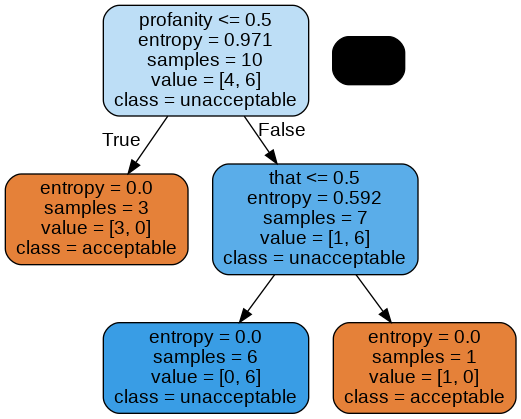

In [29]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, df['label'])

# Output a visualization of it to tree.png
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                     class_names=['acceptable', 'unacceptable'], 
                     feature_names=vectorizer.get_feature_names(),
                     out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Display tree.png here
Image(filename='tree.png')

Decision trees are are interpretable!